In [7]:
import pandas as pd
import re
from unidecode import unidecode
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
from tqdm import tqdm
tqdm.pandas()
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [8]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iansk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iansk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv")

In [10]:
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB


VEMOS LOS VALORES DUPLICADOS

In [12]:
total_duplicados = df['url'].duplicated().sum()
total_duplicados

630

ELIMINAMOS LOS VALORES DUPLICADOS DE LA COLUMNA URL


In [13]:
df = df.drop_duplicates()

CONTAMOS LOS VALORES TRUE Y FALSE DE LA COLUMNA IS SPAM

In [14]:
conteo_spam = df['is_spam'].value_counts()
conteo_spam

is_spam
False    2125
True      244
Name: count, dtype: int64

BALANCEAMOS LOS DATOS

In [15]:
# Contar la frecuencia de cada clase y obtener la frecuencia mínima entre las clases
frecuencia_minima = df['is_spam'].value_counts().min()

# Crear una muestra ponderada según la frecuencia de la clase minoritaria
df = df.groupby('is_spam').apply(lambda x: x.sample(frac=frecuencia_minima / len(x))).reset_index(drop=True)


COMPROBAMOS QUE SE HAYA BALANCEADO

In [16]:
df['is_spam'].value_counts()

is_spam
False    244
True     244
Name: count, dtype: int64

CONVERTIMOS LOS VALORES BOOLEANOS A NUMEROS ENTEROS

In [17]:
df["is_spam"] = df[["is_spam"]].astype(int)

PREPROCESAR TEXTO 

In [18]:

def preprocess_text(text):
    # Remove any character that is not a letter (a-z) or white space ( )
     # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', " ", text)
    # Multiple white spaces into one
    text = re.sub(r'\s+', " ", text.lower())
    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)
    # Remove hhtp and https
    text = re.sub(r'\b(?:http|https|com|www)\b', '', text)
    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)
    return text

df["url"] = df["url"].apply(preprocess_text)
df.head()

,url,is_spam
0,theface music alternative black women goth g...,0
1,theverge spotify interactive ads podcasts i...,0
2,healthcare utah edu publicaffairs news covid ...,0
3,apnews ccef f cf,0
4,wsj articles amazon to keep most of the job...,0


TOKENIZACIÓN

In [19]:

df['url'] = df['url'].apply(lambda x: word_tokenize(x.lower()))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      488 non-null    object
 1   is_spam  488 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 5.8+ KB


In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Crear una lista de partidos únicos en el DataFrame

NoSpam = pd.DataFrame(df.loc[df['is_spam'] == 0, 'url'])
SiSpam = pd.DataFrame(df.loc[df['is_spam'] == 1, 'url'])

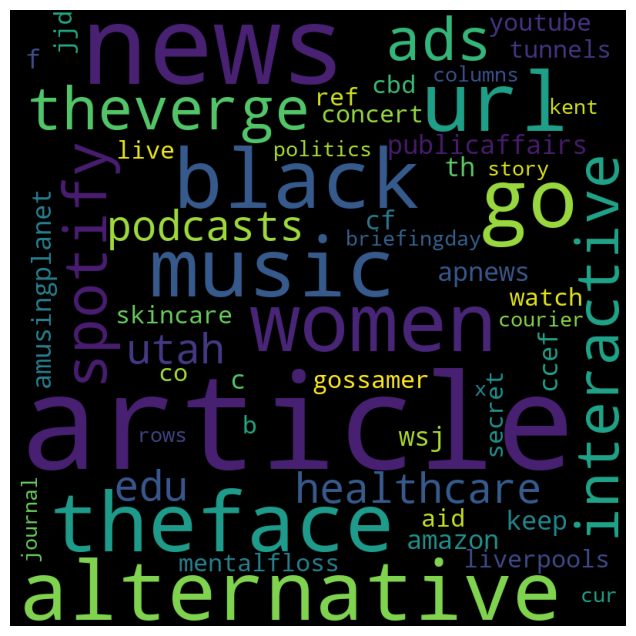

In [22]:

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(NoSpam))
fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

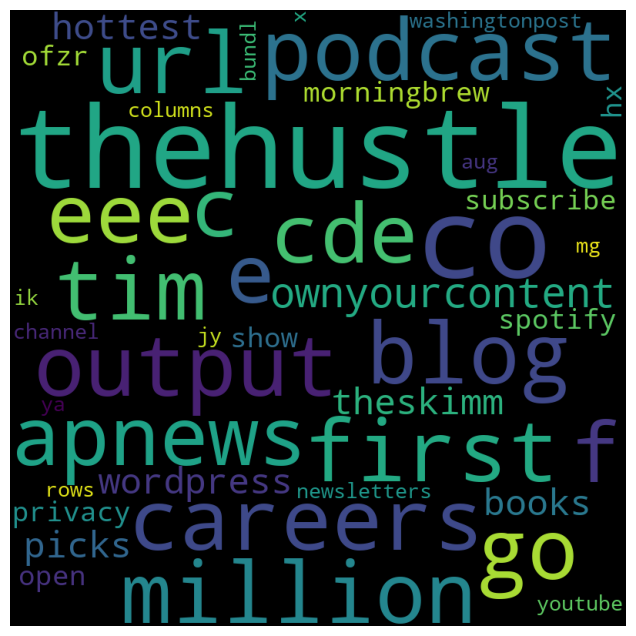

In [23]:
wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(SiSpam))
fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tokens_list = df["url"]
tokens_list = [" ".join(tokens) for tokens in tokens_list]
vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5, stop_words="english")
X = vectorizer.fit_transform(tokens_list).toarray()
y = df["is_spam"]
X[:5]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.70710678, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.70710678, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [25]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=44)

CONSTRUIR SVM (SUPPORT VECTOR MACHINE)

In [26]:
from sklearn.svm import SVC
model = SVC(kernel="linear", random_state=44)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=44)

QUE HAGA LA PREDICCIÓN EN X_TEST

In [27]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

VEMOS LA COMPARACION DE Y_TEST CON Y_PRED

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7346938775510204

AJUSTAMOS LOS HIPERPARAMETROS Y QUE SELECCIONE LOS MEJORES


In [29]:
from sklearn.model_selection import GridSearchCV
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "kernel": ['rbf', 'poly', 'sigmoid'],
    "degree": [1, 2, 3, 4, 5],
    "gamma": ["scale", "auto"]
}
# We initialize the random search
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=44),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

VEMOS LOS MEJORES HIPERPARAMETROS


In [30]:
grid.fit(X_train, y_train)
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


OPTIMIZAMOS EL MODELO CON LOS MEJORES HIPER PARAMETROS


In [41]:
opt_model = SVC(C = 10, degree = 1, gamma = "scale", kernel = "rbf", random_state = 42)
opt_model.fit(X_train, y_train)
y_pred = opt_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7653061224489796